# Problem-2 (Insurance Linear Regression Model)

In [22]:
""" Please install the following libraries before running the code """

# pip install numpy
# pip install pandas
# pip install seaborn
# pip install matplotlib
# pip install scikit-learn
# pip install statsmodels
# pip install scipy

' Please install the following libraries before running the code '

### Importing required packages

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import pearsonr
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from statsmodels.api import OLS
import pickle

----------

### Read dataset from memory

In [24]:
# First 10 rows of the data
raw_data = pd.read_csv('insurance_data.csv')
raw_data = raw_data.sort_values(by=['charges'], ascending=True)
raw_data.head(10)

,age,sex,bmi,children,smoker,region,charges
940,18,male,23.21,0,no,southeast,1121.8739
808,18,male,30.14,0,no,southeast,1131.5066
1244,18,male,33.33,0,no,southeast,1135.9407
663,18,male,33.66,0,no,southeast,1136.3994
22,18,male,34.10,0,no,southeast,1137.0110
194,18,male,34.43,0,no,southeast,1137.4697
866,18,male,37.29,0,no,southeast,1141.4451
781,18,male,41.14,0,no,southeast,1146.7966
442,18,male,43.01,0,no,southeast,1149.3959
1317,18,male,53.13,0,no,southeast,1163.4627


----------

### Encode data to process in ML model

In [25]:
# Label Encoding for categorical data

encoded_data = raw_data.copy()
# create label encoder object
le = LabelEncoder()
# encode data
encoded_data['sex'] = le.fit_transform(encoded_data['sex'])
encoded_data['smoker'] = le.fit_transform(encoded_data['smoker'])
encoded_data['region'] = le.fit_transform(encoded_data['region'])

encoded_data.head()

,age,sex,bmi,children,smoker,region,charges
940,18,1,23.21,0,0,2,1121.8739
808,18,1,30.14,0,0,2,1131.5066
1244,18,1,33.33,0,0,2,1135.9407
663,18,1,33.66,0,0,2,1136.3994
22,18,1,34.10,0,0,2,1137.0110


----------

### Information about the column (data types)

In [26]:
encoded_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1338 entries, 940 to 543
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 67.9 KB


----------

### 5-point summary

In [27]:
encoded_data.describe().loc[['min', '25%', '50%', '75%', 'max']].T

,min,25%,50%,75%,max
age,18.0000,27.00000,39.000,51.000000,64.00000
sex,0.0000,0.00000,1.000,1.000000,1.00000
bmi,15.9600,26.29625,30.400,34.693750,53.13000
children,0.0000,0.00000,1.000,2.000000,5.00000
smoker,0.0000,0.00000,0.000,0.000000,1.00000
region,0.0000,1.00000,2.000,2.000000,3.00000
charges,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


----------

### Check for null values of dataset

In [28]:
# Find Any missing value
encoded_data.isnull().mean()

age         0.0
sex         0.0
bmi         0.0
children    0.0
smoker      0.0
region      0.0
charges     0.0
dtype: float64

----------

### Check data relation

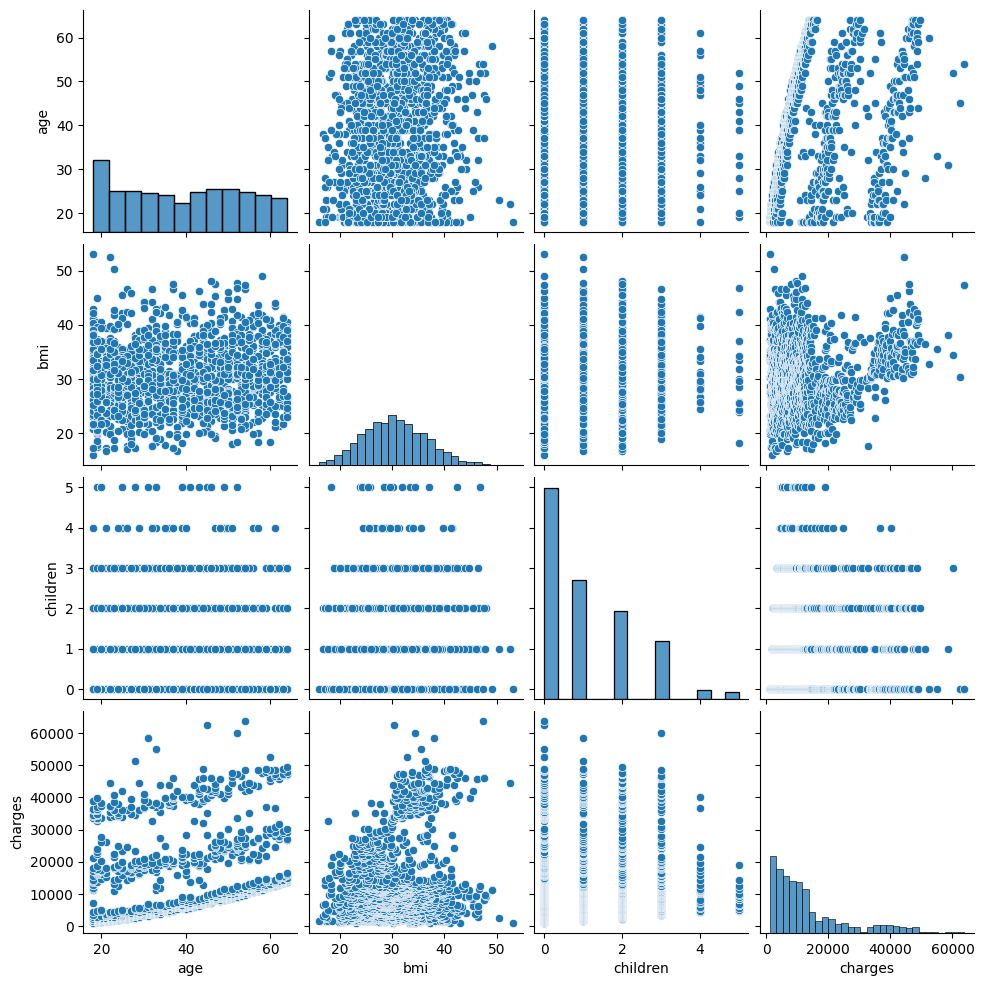

In [29]:
sns.pairplot(raw_data)

----------

### Data correlation & density

----------

               age       sex       bmi  children    smoker    region   charges
age       1.000000 -0.020856  0.109272  0.042469 -0.025019  0.002127  0.299008
sex      -0.020856  1.000000  0.046371  0.017163  0.076185  0.004588  0.057292
bmi       0.109272  0.046371  1.000000  0.012759  0.003750  0.157566  0.198341
children  0.042469  0.017163  0.012759  1.000000  0.007673  0.016569  0.067998
smoker   -0.025019  0.076185  0.003750  0.007673  1.000000 -0.002181  0.787251
region    0.002127  0.004588  0.157566  0.016569 -0.002181  1.000000 -0.006208
charges   0.299008  0.057292  0.198341  0.067998  0.787251 -0.006208  1.000000


<Axes: >

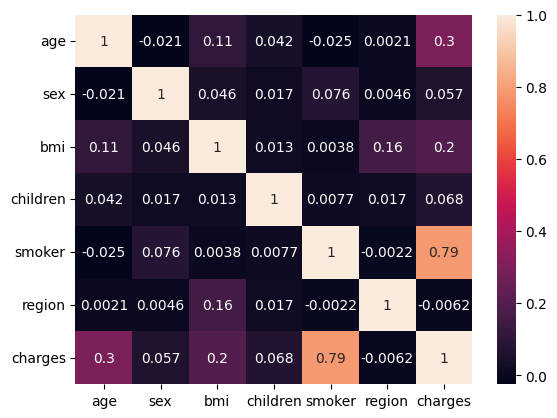

In [30]:
# Check Correlation of the data
print(encoded_data.corr())
sns.heatmap(encoded_data.corr(), annot=True)

#### NOTE: We can see Age, Bmi, Smoker and high correlation with charges

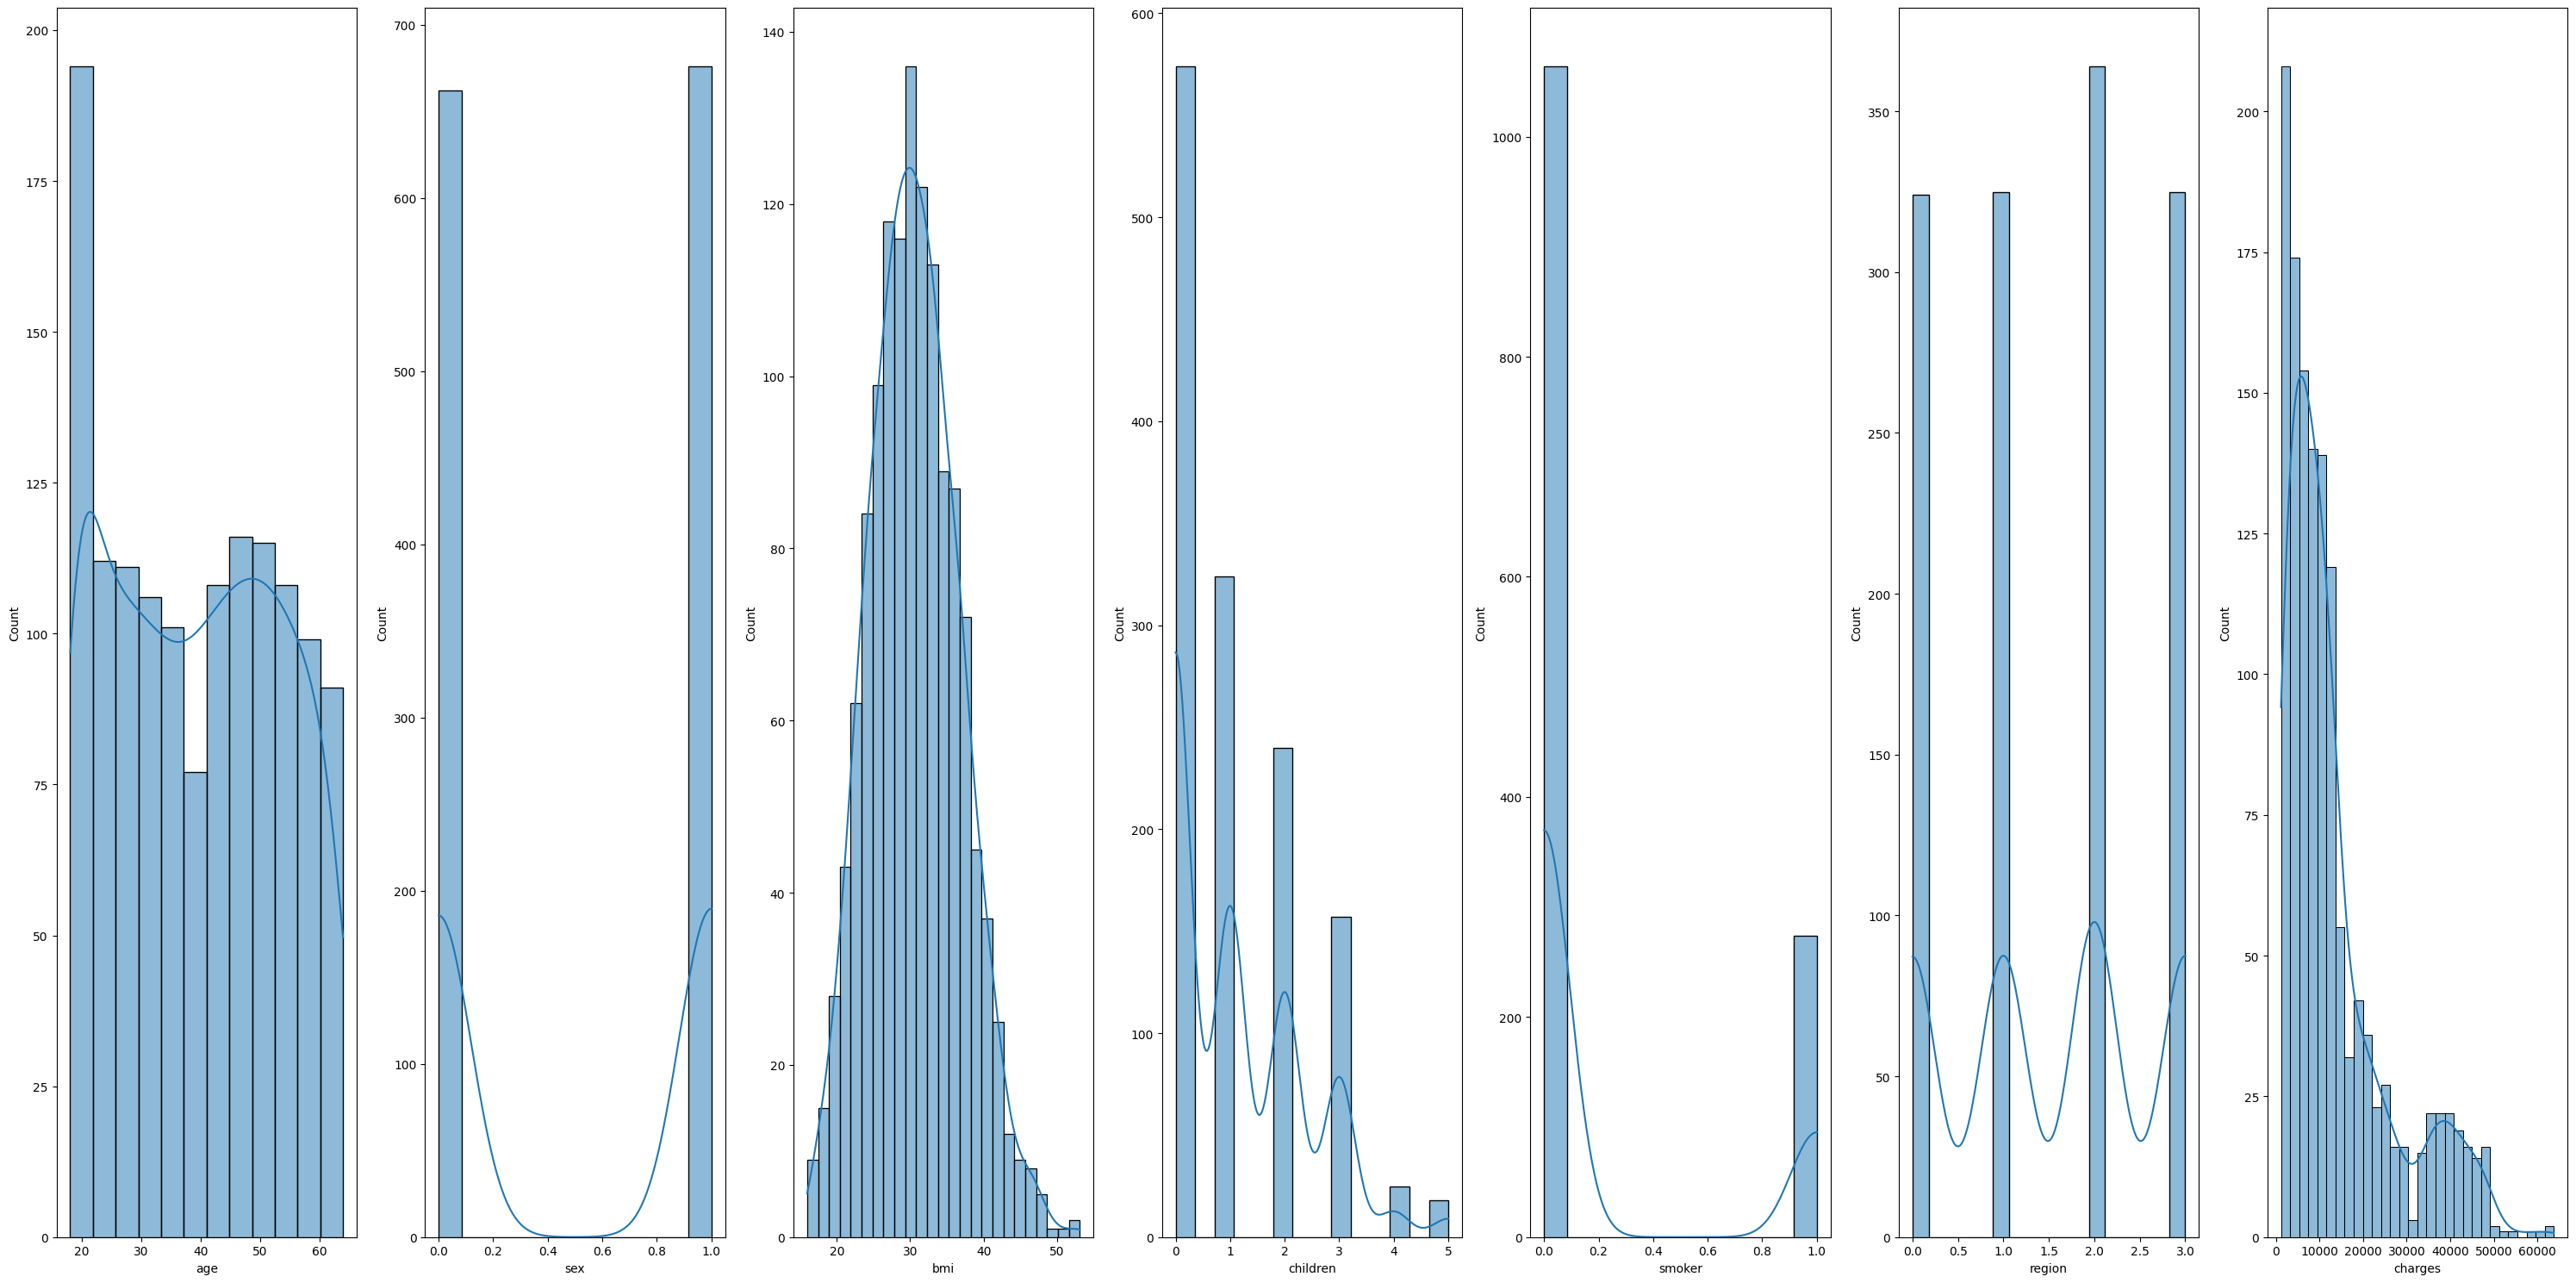

In [31]:
fig, axes = plt.subplots(ncols=len(encoded_data.columns), figsize=(30,15))
for ax, col in zip(axes, encoded_data.columns):
  sns.histplot(encoded_data[col], ax=ax, kde=True)
  plt.tight_layout() 
plt.show()


----------

### Find outliers and show with graph

In [32]:
#create a function to find outliers using IQR
def find_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   outliers = df[((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]
   return outliers

outliers_bmi = find_outliers_IQR(encoded_data['bmi'])

print('Bmi outliers: ')
print(f'Number of outliers: {len(outliers_bmi)}')
print(f'Max outlier value: {outliers_bmi.max()}')
print(f'min outlier value: {outliers_bmi.min()}')

outliers_charges = find_outliers_IQR(encoded_data['charges'])
print('---------------')
print('Charges outliers: ')
print(f'Number of outliers: {len(outliers_charges)}')
print(f'Max outlier value: {outliers_charges.max()}')
print(f'min outlier value: {outliers_charges.min()}')

outliers_age = find_outliers_IQR(encoded_data['age'])
print('---------------')
print('Age outliers: ')
print(f'Number of outliers: {len(outliers_age)}')
print(f'Max outlier value: {outliers_age.max()}')
print(f'min outlier value: {outliers_age.min()}')

Bmi outliers: 
Number of outliers: 9
Max outlier value: 53.13
min outlier value: 47.41
---------------
Charges outliers: 
Number of outliers: 139
Max outlier value: 63770.42801
min outlier value: 34617.84065
---------------
Age outliers: 
Number of outliers: 0
Max outlier value: nan
min outlier value: nan


Bmi and charges have outliers show with boxplot

<Axes: >

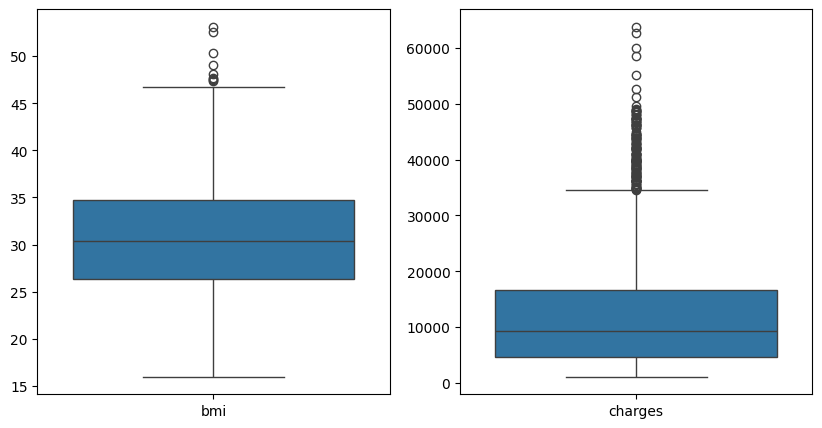

In [33]:
#Show out outliers with boxplot
fig, ax = plt.subplots(ncols=2, figsize=(10, 5))
sns.boxplot(data=encoded_data[['bmi']], ax=ax[0])
sns.boxplot(data=encoded_data[['charges']], ax=ax[1])

----------

# Linear Regression Model

### Create Model with just normal encoded data

----------

In [34]:
# This util function will help find summary of the model
def model_summary(x, y):
    x1 = sm.add_constant(x)
    model = OLS(y,x1).fit()
    print(model.summary())


# Create linear regression model show summary
def create_model(df, factor_col_set = ['age', 'sex', 'bmi', 'children', 'smoker', 'region']):
    # Test train split for supervised training
    train, test= train_test_split(df,test_size=0.2,random_state=42)
    
    # Create linear regression model
    linear_regression_model = LinearRegression()
    linear_regression_model.fit(train[factor_col_set],train['charges'])
    
    # Predict the test data
    y_predicted = linear_regression_model.predict(test[factor_col_set])

    print('-----------------')
    # Mean Squared Error
    rms = mean_squared_error(test['charges'], y_predicted, squared=False)
    print(f'Root Mean Squared Error: {rms}')
    
    # r-squared
    model_score = linear_regression_model.score(train[factor_col_set],train['charges'])
    print(f'R-squared: { model_score } ') 
    # Coefficients and intercept
    print('Coefficients (weights): ', linear_regression_model.coef_)
    print('Intercept: ', linear_regression_model.intercept_)
    print('-----------------')
        
    model_summary(train[factor_col_set],train['charges'])
    
    return [linear_regression_model, train, test ]
    
# funtion to drop outliers using IQR
def drop_outliers_IQR(df):
   q1=df.quantile(0.25)
   q3=df.quantile(0.75)
   IQR=q3-q1
   return df[~((df<(q1-1.5*IQR)) | (df>(q3+1.5*IQR)))]

In [35]:
# Create model without outliers remove
_, _, _ = create_model(encoded_data)

-----------------
Root Mean Squared Error: 5419.301439591062
R-squared: 0.7319700436874097 
Coefficients (weights):  [  252.4313338    -96.41799402   323.62766489   569.23807621
 23515.3897952   -355.51330244]
Intercept:  -11465.88130719961
-----------------
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.730
Method:                 Least Squares   F-statistic:                     483.8
Date:                Wed, 06 Dec 2023   Prob (F-statistic):          9.15e-300
Time:                        15:02:31   Log-Likelihood:                -10861.
No. Observations:                1070   AIC:                         2.174e+04
Df Residuals:                    1063   BIC:                         2.177e+04
Df Model:                           6                                         
Covariance Type:            no

We are able to achive 73.2% accuracy. let improve by removing outliers and above presented 'Charges' and 'BMI'

----------

### Model 2 removing 'charges' outliers

----------

As we have see charges have around 139 outliers. let remove them and find module accuracy

In [36]:
charges_not_outliers = drop_outliers_IQR(encoded_data['charges'])
charges_not_outliers_df = encoded_data[ encoded_data['charges'].isin(charges_not_outliers) ]

print('After removing charges outliers:')
print(f'Number of outliers: {len(charges_not_outliers)}')
print(f'Max outlier value: {charges_not_outliers.max()}')
print(f'min outlier value: {charges_not_outliers.min()}')
print('---------------')

# Create model after removing charges outliers
_, _, _ = create_model(charges_not_outliers_df)

After removing charges outliers:
Number of outliers: 1199
Max outlier value: 34472.841
min outlier value: 1121.8739
---------------
-----------------
Root Mean Squared Error: 4161.63035758592
R-squared: 0.5863316539558161 
Coefficients (weights):  [  249.39102587  -374.00829128    56.01694043   370.28607393
 14234.95488937  -500.63617801]
Intercept:  -2533.4429983701484
-----------------
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.586
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     224.9
Date:                Wed, 06 Dec 2023   Prob (F-statistic):          1.32e-178
Time:                        15:02:31   Log-Likelihood:                -9459.2
No. Observations:                 959   AIC:                         1.893e+04
Df Residuals:                     952   BIC:            

As result found after removing 'charges' outliers model accuracy decreased by 14.6% approx. So can't go this.

----------

### Model 3 removing 'BMI' outliers

----------

As we have see BMI have around 9 outliers. let remove them and find module accuracy

In [37]:
bmi_not_outliers = drop_outliers_IQR(encoded_data['bmi'])
bmi_not_outliers_df = encoded_data[ encoded_data['bmi'].isin(bmi_not_outliers) ]

print('After removing bmi outliers:')
print(f'Number of outliers: {len(bmi_not_outliers)}')
print(f'Max outlier value: {bmi_not_outliers.max()}')
print(f'min outlier value: {bmi_not_outliers.min()}')
print('---------------')

# Create model after removing charges outliers
_, _, _ = create_model(bmi_not_outliers_df)

After removing bmi outliers:
Number of outliers: 1329
Max outlier value: 46.75
min outlier value: 15.96
---------------
-----------------
Root Mean Squared Error: 5839.8331706538365
R-squared: 0.7478626398304611 
Coefficients (weights):  [  255.25779142    44.03486649   333.26115865   564.2321066
 23432.36284799  -457.92432205]
Intercept:  -11716.481268359434
-----------------
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.746
Method:                 Least Squares   F-statistic:                     522.0
Date:                Wed, 06 Dec 2023   Prob (F-statistic):          9.11e-312
Time:                        15:02:31   Log-Likelihood:                -10763.
No. Observations:                1063   AIC:                         2.154e+04
Df Residuals:                    1056   BIC:                       

After removing 'BMI' outliers, model accuracy increased by 1.6% approx. let try further improve it. As we can see in statsmodel report gender and region have least relevence to model lets prepare model with this columes.


----------

### Model 4 removing gender from model due less Correlation with other data

----------

In [38]:
# Create model after removing charges outliers
final_model, train_data, test_data = create_model(bmi_not_outliers_df,['age', 'bmi', 'children', 'smoker', 'region'])

-----------------
Root Mean Squared Error: 5839.123595451664
R-squared: 0.747859310561535 
Coefficients (weights):  [  255.19044197   333.32172275   564.64542666 23435.54391248
  -457.79782658]
Intercept:  -11694.546621584022
-----------------
                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.748
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     627.0
Date:                Wed, 06 Dec 2023   Prob (F-statistic):          3.48e-313
Time:                        15:02:31   Log-Likelihood:                -10763.
No. Observations:                1063   AIC:                         2.154e+04
Df Residuals:                    1057   BIC:                         2.157e+04
Df Model:                           5                                         
Covariance Type:            nonrobust        

----------

### Store Model with pickle as binary file

In [39]:
pickle.dump(final_model, open('insurance_model.pkl','wb'))

----------

Now finaly able to achive accuracy of 74.8%, lets see on graph

<Axes: xlabel='bmi', ylabel='charges'>

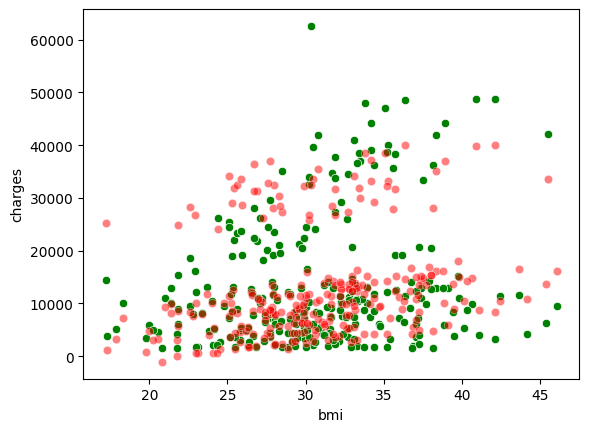

In [40]:
predictions = final_model.predict(test_data[['age', 'bmi', 'children', 'smoker', 'region']])

# We will use Bmi and charges to better present graph
sns.scatterplot(x=test_data['bmi'], y=test_data['charges'], color='g')
sns.scatterplot(x=test_data['bmi'], y=predictions, color='r', alpha=0.5)

----------

## Summary



This is atmost accuracy we can achive with is data set. Because this data is not linear in nature as we can see smoker with all Bmi have much more Charges than non smoker same trends can see in age, charges and somker

<Axes: xlabel='bmi', ylabel='charges'>

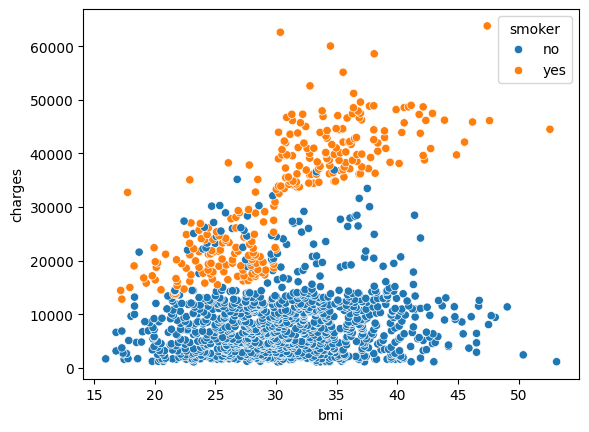

In [41]:
sns.scatterplot(x=raw_data['bmi'], y=raw_data['charges'], hue=raw_data['smoker'])

<Axes: xlabel='age', ylabel='charges'>

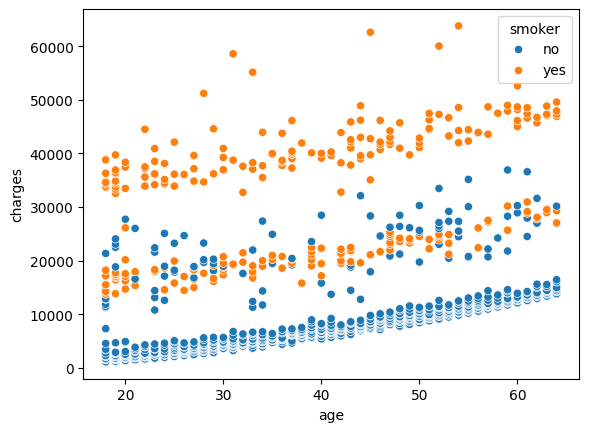

In [42]:
sns.scatterplot(x=raw_data['age'], y=raw_data['charges'], hue=raw_data['smoker'])